<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_new_segmentation_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.8

In [3]:
#!pip install mahotas

In [4]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 166.11 MiB | 28.26 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 193 (delta 81), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (193/193), 211.75 MiB | 23.52 MiB/s, done.
Resolving deltas: 100% (81/81), done.
Checking out files: 100% (51/51), done.
/content/Doutorado/MarquesGabi_Routines


In [9]:
FILE='SugarSample03.zip'
img_name=[]
x_original = [] 

data_file ='xls'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        #df =pd.read_csv(name)
        if( k > 0):
          df_old = df_ImgJ.copy()
        df_ImgJ = pd.read_excel(name)
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [10]:
f.namelist()

['Results_03_02.xls', 'Results_03_03.xls', 'Results_03_01.xls']

In [11]:
df_ImgJ.shape

(174, 13)

In [12]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [13]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [14]:
from Segment_Filter_revisited_One import Segmenta  # got image provided segmented

In [15]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 193 (delta 81), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (193/193), 211.75 MiB | 23.16 MiB/s, done.
Resolving deltas: 100% (81/81), done.
Checking out files: 100% (51/51), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [16]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [17]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [18]:
Img_Size = 28

In [19]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 134ms/step - loss: 0.5590 - accuracy: 0.7114 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 112ms/step - loss: 0.3187 - accuracy: 0.8717 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 112ms/step - loss: 0.1748 - accuracy: 0.9446 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 116ms/step - loss: 0.1230 - accuracy: 0.9592 - val_loss: 0.6933 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 113ms/step - loss: 0.0860 - accuracy: 0.9679 - val_loss: 0.6937 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 114ms/step - loss: 0.0805 - accuracy: 0.9738 - val_loss: 0.6946 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 115ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.6931 - val_accuracy: 0.5102

In [21]:
Y_test = yback(Y_test)

In [22]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        71   1
1         3  72


In [23]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.99      0.96      0.97        75

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



In [24]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [25]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [26]:
Sample3 =[4,13,25]
Repetir = 80
for i in range(Repetir):
  k = 0
  for i in Sample3:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [27]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,117.006805,109.582764,107.047623,102.589577,103.693878,108.065765,117.886627,114.054436,125.934242,107.158730,78.385498,80.430847,83.517006,86.306122,76.020416,47.163265,10.929705,1.283447,0.510204,1.607710,1.798186,0.750567,0.179138,1.226758,1.607710,0.560091,0.369615,1.417233,117.120178,113.487534,109.102043,98.929703,93.680275,105.517014,150.231293,166.653076,129.371887,95.947845,77.501137,73.578232,...,1.537415,0.961451,0.056689,1.009070,1.807256,0.759637,0.188209,1.235828,1.616780,0.569161,0.378685,1.426304,89.086174,129.204102,147.129257,130.081635,106.943314,120.548767,124.467117,132.648529,140.206360,143.367355,136.820877,129.374161,124.149658,112.154198,39.011341,3.523810,3.641724,0.961451,0.056689,1.009070,1.807256,0.759637,0.188209,1.235828,1.616780,0.569161,0.378685,1.426304
1,0.885263,0.205945,1.382339,1.865936,2.560239,23.361052,61.788448,110.758369,109.514969,67.484497,62.398266,55.886871,60.068306,89.129059,103.289276,103.137169,102.607079,112.320122,114.410439,112.944603,113.632957,111.271133,104.622101,110.731064,149.979752,162.968094,179.918472,160.221832,0.936242,0.231434,1.213718,1.196492,1.734148,20.037989,37.756588,30.539827,33.511818,56.170544,54.091904,36.128670,...,1.597458,0.425860,0.638878,1.334162,1.910647,3.478309,4.894681,1.943944,2.450614,2.528063,1.125731,1.555968,0.883302,0.204965,1.376562,1.341059,0.174364,0.949407,1.654669,0.483071,0.577746,1.699975,0.814327,0.264136,1.435734,1.281888,0.124996,1.057946,1.595497,0.423900,0.636917,2.495186,3.176499,3.574175,1.963692,1.984419,1.943839,2.071566,1.464795,1.410735
2,185.569336,184.497726,160.263550,164.817276,167.157059,161.224991,148.909088,135.479340,145.491287,148.018372,148.721771,138.779617,132.887985,144.550980,140.430679,125.501381,97.669426,73.041328,64.400368,67.808083,104.614326,152.576675,168.231415,179.985306,173.247025,161.512405,144.075317,141.850327,209.968796,222.303055,181.866852,173.389359,165.863174,156.387527,146.017456,142.269989,138.531693,137.279175,136.238754,130.402222,...,155.443527,170.194687,150.786972,143.404037,147.043167,146.317734,157.563828,167.962357,186.473846,196.610687,189.543640,187.836563,139.411392,150.381088,175.269974,171.174469,163.563828,149.772278,146.206619,149.808090,179.288345,188.301208,177.324158,173.974304,176.281921,159.819107,160.056946,164.892578,166.938492,175.752075,156.269058,146.236908,144.730957,145.854004,159.845734,164.729126,180.090912,197.668518,196.250702,183.003677
3,165.030304,161.573044,156.454697,152.309799,155.713608,160.343887,163.861237,165.164230,162.962631,162.850357,169.740875,179.066559,180.461121,152.478180,178.228607,216.823944,205.687286,200.921692,193.243393,188.265411,183.349838,174.037888,167.609528,172.839996,171.274261,167.071899,170.801941,177.532455,164.772659,162.808060,160.790497,156.792221,159.545532,159.562454,162.485703,161.852142,161.916824,164.010498,172.004929,181.986603,...,196.529648,191.299011,182.993103,177.928192,178.289368,177.908936,174.406219,173.836563,173.682739,169.726456,166.547333,165.993347,221.808929,248.549286,252.780548,253.301971,252.032806,251.318893,250.407562,239.772568,222.929688,189.390015,141.869598,168.885040,175.715714,194.644363,208.556259,215.611313,213.017227,201.420868,187.578110,176.080414,176.489075,175.899353,170.618912,171.352417,170.697540,167.729263,164.557373,160.807510
4,187.563553,189.047974,174.971802,173.749329,158.307953,151.087708,152.837494,161.558258,164.497955,162.705200,160.725296,148.372314,101.264221,126.801384,137.273621,136.432510,138.350266,139.020966,141.672104,139.655426,98.554665,208.523148,211.086243,197.156952,199.244324,204.195724,209.346771,214.477768,198.030014,191.086594,187.856186,182.187775,171.108002,165.097687,163.787842

In [28]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [29]:
#df_ann

In [30]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [31]:
img_graos.shape

(5, 785)

In [32]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
img_graos.shape

(5, 785)

In [34]:
Width=np.array(Width_new)

In [35]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 793, done.
remote: Counting objects: 100% (554/554), done.
remote: Compressing objects: 100% (552/552), done.
remote: Total 793 (delta 360), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (793/793), 6.08 MiB | 10.73 MiB/s, done.
Resolving deltas: 100% (497/497), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [36]:

!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 11.17 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


''

In [37]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [38]:
Width.shape

(5,)

In [39]:
Width

array([136, 148, 106, 117, 144])

In [40]:
img_graos.shape

(5, 785)

In [41]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
47,136.0,110.044113,113.580460,110.014709,108.563156,113.312286,116.138412,128.641876,140.247406,142.080444,138.166977,133.018173,130.166092,129.059692,127.017303,120.917824,110.437714,99.748268,96.020767,96.856400,94.644463,88.574394,93.650520,98.285477,108.295853,115.266434,128.760391,136.820953,124.889275,112.250008,110.857269,111.818336,108.235291,106.054497,108.009514,134.616776,148.973206,139.844299,135.096893,131.320068,...,181.814880,183.610733,180.764709,185.764709,182.729233,185.030289,186.539810,194.494827,201.853806,202.517303,194.365067,183.788925,129.015579,130.360733,133.083908,134.224915,137.954147,147.737885,164.583054,172.237915,176.475784,162.102936,145.570938,143.506912,153.552765,172.226654,186.375427,189.456741,187.391876,185.333069,188.521637,187.673889,188.092575,186.476624,182.466278,188.096893,194.561432,199.884079,200.085648,181.317474
54,148.0,148.013153,149.035812,139.347702,172.360138,192.904327,192.580734,189.279770,166.096451,166.948868,176.525940,185.619446,191.101547,214.640625,236.087677,224.821060,218.032883,200.376923,175.619446,172.034332,168.018265,173.035065,167.453613,183.989792,231.642822,202.313370,167.135147,169.739227,160.970795,149.049683,149.905045,139.592407,164.690277,193.700531,195.934982,192.111023,189.682266,190.490158,192.393005,192.868546,...,229.912354,237.192108,210.328720,209.221344,201.992706,162.994171,143.035065,148.298752,153.732666,162.327255,168.158508,176.590942,252.025574,251.415634,151.215485,107.897011,141.477722,156.700516,164.232300,165.376923,155.773590,150.890442,147.626022,152.182617,145.585114,157.011688,193.720993,191.135162,245.884598,245.152679,207.060638,205.257858,174.639893,145.487961,149.399582,147.317764,153.178970,162.802048,168.061356,172.552979
87,106.0,169.724472,181.349228,183.609116,182.084732,185.255600,186.354218,187.957626,186.841248,167.061951,138.153442,145.903168,145.092911,140.756866,138.802429,135.651123,128.255615,93.085442,100.013893,126.739418,144.817017,151.169815,150.676407,149.009613,153.141342,155.791382,157.159851,158.896759,160.566406,178.375229,180.037750,182.161636,184.427917,188.289429,185.716995,177.929153,174.831970,165.094696,153.212906,148.786041,...,112.896057,99.766823,111.244926,144.033112,155.155579,160.860092,162.839813,158.805634,154.320053,147.684235,143.912064,141.125320,158.639740,119.543259,34.564262,60.352089,79.218590,76.222504,67.812744,59.966537,55.685658,51.672127,47.247421,66.143112,93.747955,111.918839,119.278404,109.768967,109.535431,103.812393,113.380203,130.179779,144.709869,152.511932,151.739044,147.576721,143.526169,135.987549,124.982208,120.935211
101,117.0,76.021843,81.510780,89.248962,88.220833,88.744682,86.949219,91.477028,98.769012,99.583679,101.622253,97.452042,84.794144,91.021034,90.241142,87.490097,101.233551,126.640808,132.701736,118.439407,115.156036,122.040039,126.706261,118.958946,99.605743,84.011841,100.307838,112.836288,118.100662,70.092270,79.252464,89.177811,90.236031,89.933662,85.863396,90.036308,94.516106,93.443420,94.797356,88.919350,...,155.607132,153.279266,148.904388,146.943832,147.363205,147.873260,153.948288,159.045212,156.180222,150.931625,146.978455,143.875671,78.002914,75.646431,81.144714,92.603989,98.659363,109.892471,130.189926,140.866394,144.959320,140.100815,133.012573,133.434662,136.260498,139.605530,144.536484,150.111908,155.660904,149.320770,144.640228,144.324493,148.956177,152.233109,154.633514,157.166626,154.187683,149.266632,150.359558,149.362701
138,144.0,253.439026,253.869598,254.302505,253.283173,249.251541,235.435211,200.236130,207.342606,200.547836,195.418976,197.372681,197.334122,191.807114,185.644302,183.576401,180.101089,167.001541,142.506180,150.530869,165.532410,172.924393,167.

In [42]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [43]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [44]:
len(Diameter_All)

5

In [45]:
#

PSD_new['Area'].shape

(95,)

In [46]:
#PSD_new.shape

In [47]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )
Area2 = PSD_new['Area'].values
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [48]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [49]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
0,1.280599,0.719867,0.868192,1.330818,0.836067,0.923618,0.955465,0.904113,0.697408,0.911127,1.045198,0.970012,0.579772,0.628255,0.600272,0.659885,0.934581,0.731273,0.777682,1.113042,0.753568,0.874039,0.918781,0.970012,0.623168,1.355934,0.932536,0.906925,0.858607,0.660849,0.952796,1.028621,0.891348,0.85638,0.575363,1.260557,1.048239,0.606602,0.860088,0.769452,...,1.550444,0.782578,1.469061,1.053087,1.267607,0.7744,1.378748,1.363893,1.299352,1.287045,1.118178,0.947435,1.521848,1.352644,1.155694,1.601345,1.274619,1.422384,1.340826,1.172646,1.149065,1.45906,1.248377,1.336546,0.960117,1.486723,1.427745,1.350288,0.756098,1.259041,1.134568,1.654913,1.120453,1.117608,0.91531,1.163927,1.306681,1.152936,1.30473,1.306681
1,1.113087,1.259634,0.804753,0.980958,1.207333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
Diameter_All

[1.1130874260995183,
 1.2596338778968452,
 0.8047534884521298,
 0.9809584438772823,
 1.2073334693874245]

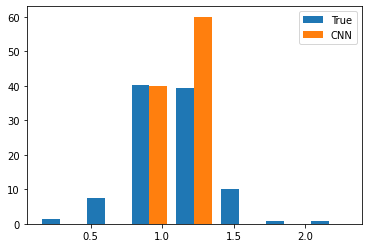

In [51]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [52]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.0865462723070898 desvio= 0.279391220003608 pontos= 269


In [53]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.07315334114264 desvio= 0.16426345214400184 pontos= 5


In [54]:
# Software: media= 1.3185563233999378 desvio= 0.2728642468732428 pontos= 66

In [55]:
np.mean(np.array(Diameter_All))

1.07315334114264

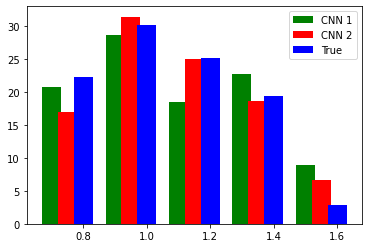

In [56]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])